# Price Prediction using Regression

This is a tickets pricing monitoring system. It scrapes tickets pricing data periodically and stores it in a database. Ticket pricing changes based on demand and time, and there can be significant difference in price. We are creating this product mainly with ourselves in mind. Users can set up alarms using an email, choosing an origin and destination (cities), time (date and hour range picker) choosing a price reduction over mean price, etc.

**Following is the description for columns in the dataset**<br>
- insert_date: date and time when the price was collected and written in the database<br>
- origin: origin city <br>
- destination: destination city <br>
- start_date: train departure time<br>
- end_date: train arrival time<br>
- train_type: train service name<br>
- price: price<br>
- train_class: ticket class, tourist, business, etc.<br>
- fare: ticket fare, round trip, etc <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

#### **Task 1: Import Dataset and create a copy of that dataset**

In [2]:
data = pd.read_csv('data1.csv')
df = data.copy() 

#### **Task 2: Display first five rows** 

In [3]:
df.head(5)

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


#### **Task 3: Drop 'unnamed: 0' column**

In [4]:
df.drop('Unnamed: 0',axis = 1, inplace = True)

In [5]:
df.head(5)

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


#### **Task 4: Check the number of rows and columns**

In [6]:
df.shape

(215909, 9)

#### **Task 5: Check data types of all columns**

In [7]:
df.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

#### **Task 6: Check summary statistics**

In [8]:
df.describe()

,price
count,202321.000000
mean,56.723877
std,25.531787
min,16.600000
25%,28.350000
50%,53.400000
75%,76.300000
max,206.800000


#### **Task 7: Check summary statistics of all columns, including object dataypes**

In [9]:
df.describe(include = 'all')

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,30543,5,5,2231,2870,16,NaN,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


**Question: Explain the summary statistics for the above data set**

**Answer:** Summary statistics shows that there is only one column 'price' in numerical. all other columns are object type because we are unable to see the measures of center and spread of the data columns except 'price'. The price column shows that there are null values present in it, and the average(mean) ticket price is 56.7 usd/pound. However, the median is 53, which is less than the mean. This shows that there are outliers at the right side of the distribution which are extending the distribution to the right. Therefore, price is right skewed distribution.

#### **Task 8: Check null values in dataset**

In [10]:
df.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

#### **Task 9: Fill the Null values in the 'price' column.**<br>


In [11]:
df['price'].fillna(df['price'].median(), inplace = True)

#### **Task 10: Drop the rows containing Null values in the attributes train_class and fare**

In [12]:
df.dropna(subset=['train_class','fare'],axis = 0,inplace = True)

#### **Task 11: Drop 'insert_date'**

In [13]:
df.drop('insert_date', axis = 1, inplace = True)

**Check null values again in dataset**

In [14]:
df.isnull().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

#### **Task 12: Plot number of people boarding from different stations**


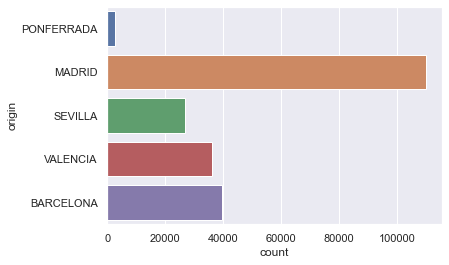

In [15]:
sns.countplot(y = 'origin', data = df); # semicolon will remove the extra line

**Question: What insights do you get from the above plot?**

**Answer:** This shows that most of people are booking tickets/coming from Madrid and least people are coming/boarding from Ponferrada. Remaining 3 stations has less variation in their distributions. We can apply passenger safety and comfort measurables in the Madrid station, and form a strategy or a feasibility study to find if the ponferrada station is going to be profitable in near future. Or we can form a strategy to grnerate more passengers from ponferrada station.

#### **Task 13: Plot number of people for the destination stations**


<AxesSubplot:xlabel='count', ylabel='destination'>

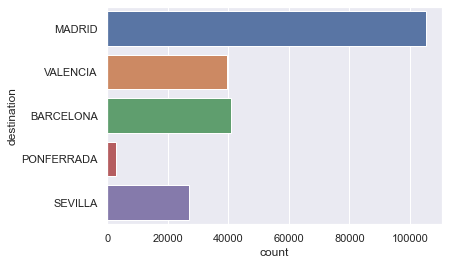

In [16]:
sns.countplot(y = 'destination', data = df)

**Question: What insights do you get from the above graph?**

**Answer:** <br>
This shows that most of people are going to from Madrid and least people are going to Ponferrada. Valencia and Barcelona stations has equal number of passenger destination while Sevilla has more than Ponferrada but less than other 3 stations passengers. As from the previous plot and this plot, it has been observed that Madrid is the busiest station among all other stations that are under consideration. Therefore, management can take measures to ensure the safety and security plans to avoid any mismanagement.

#### **Task 14: Plot different types of train that runs in Spain**


<AxesSubplot:xlabel='count', ylabel='train_type'>

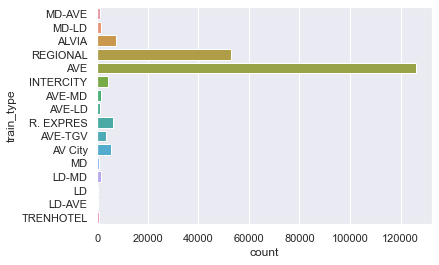

In [17]:
sns.countplot(y='train_type', data = df)

**Question: Which train runs the maximum in number as compared to other train types?**

**Answer:** <br>
'AVE' train runs the maximum number as compared to other trains.


#### **Task 15: Plot number of trains of different class**


<AxesSubplot:xlabel='count', ylabel='train_class'>

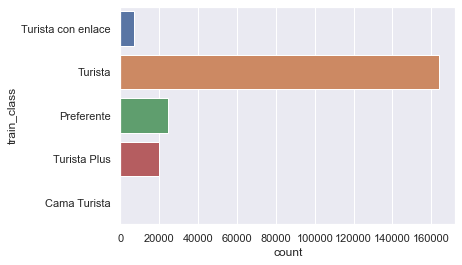

In [18]:
sns.countplot(y = 'train_class',data = df)


**Question: Which the most common train class for traveling among people in general?**

**Answer:** <br> Turista is the most common train among people in general.


In [19]:
df.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


#### **Task 16: Plot number of tickets bought from each category**


<AxesSubplot:xlabel='count', ylabel='train_class'>

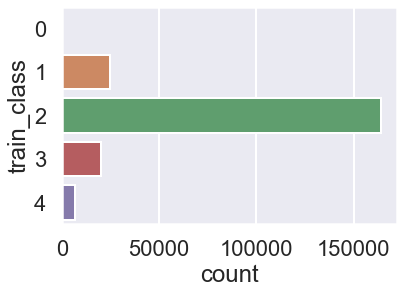

In [103]:
sns.countplot(y = 'train_class', data = df)

#### **Task 17: Plot distribution of the ticket prices**

<AxesSubplot:xlabel='price', ylabel='Count'>

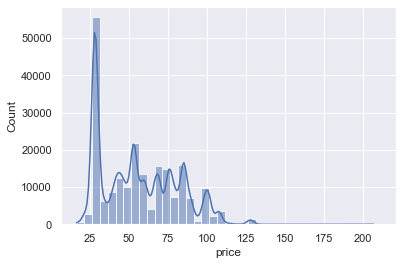

In [21]:
sns.histplot(x = 'price', data = df, binwidth = 5, kde = True)

**Question: What readings can you get from the above plot?**

**Answer:** <br> it can be seen that the distribution is right skewed. it has high values tickets prices till 200. however most of the prices fall between 25-35 $/pound. which means that people are usually traveling on cheap tickets.  

###### **Task 18: Show train_class vs price through boxplot**

<AxesSubplot:xlabel='train_class', ylabel='price'>

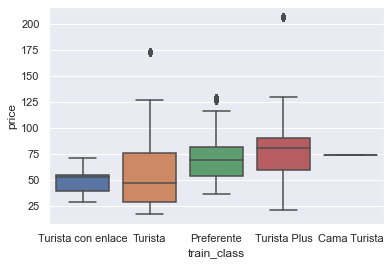

In [22]:
sns.boxplot(x = 'train_class', y = 'price',data = df)

**Question: What pricing trends can you find out by looking at the plot above?**

**Answer:** <br> The box plots of the price distribution with train class has some abnormal behavior in it. for example 'Turista' class of train has outliers at 175 however the median price of 'Turista' class is at 50 with minimum ticket price is ~ 20 dollar. which shows that there are some passengers who are paying a lot more than the usual passengers. Similar behavior can be found in 'Turista Plus' but in this class the minimum price of ticket is ~ 25 dollar and it has many high outliers approaching more than 200dollar. it shows that 'Turista Plus has more minimum, 50 percent (at80 dollar) and maximum prices, it is more revenue gererator than 'Turista'. Furthermore, train class 'Preferente' has more  minimum price '~40 dollar' but its maximum is less than 'Turista' and 'Turista Plus'.'Turista con enlace' has no outliers and has very small variation in distribution with right skewed distribution. Finally, 'Cama Turista' has no values in it. it is not generating any business.

#### **Task 19: Show train_type vs price through boxplot**


<AxesSubplot:xlabel='price', ylabel='train_type'>

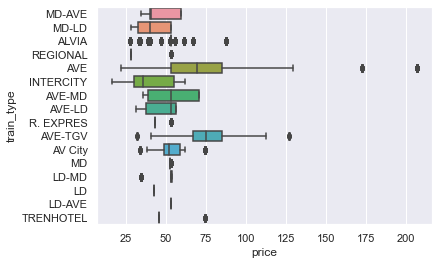

In [23]:
sns.boxplot(y = 'train_type', x = 'price',data = df)

**Question: Which type of trains cost more as compared to others?**

**Answer:** 
'Ave' Trainhas more variant distribution in it however its minimum price is at second number in lowest among all other trains, with much higher outlier values in it.


## Feature Engineering


In [24]:
df = df.reset_index()

In [25]:
df.drop(['index'],axis = 1, inplace = True)

**Finding the travel time between the place of origin and destination**<br>
We need to find out the travel time for each entry which can be obtained from the 'start_date' and 'end_date' column. Also if you see, these columns are in object type therefore datetimeFormat should be defined to perform the necessary operation of getting the required time.

**Import datetime library**

In [26]:
import datetime

In [27]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = datetime.datetime.strptime(b, datetimeFormat) - datetime.datetime.strptime(a, datetimeFormat)
    return(round((diff.seconds/3600.0),2))                  
    

In [28]:
df['travel_time_in_hrs'] = df.apply(lambda x:fun(x['start_date'],x['end_date']), axis = 1)

#### **Task 20: Remove redundant features**


**You need to remove features that are giving the related values as  'travel_time_in_hrs'**<br>
*Hint: Look for date related columns*

In [29]:
df.drop(['start_date','end_date'],axis = 1, inplace = True)  

We now need to find out the pricing from 'MADRID' to other destinations. We also need to find out time which each train requires for travelling. 

## **Travelling from MADRID to SEVILLA**

#### Task 21: Findout people travelling from MADRID to SEVILLA

In [30]:
df

,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.70
1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.80
2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,5.92
3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,4.98
4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,4.13
...,...,...,...,...,...,...,...
215261,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.63
215262,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.53
215263,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.63
215264,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.67


In [31]:
df1 = df.loc[df['origin']=='MADRID']
df1 = df.loc[df['destination']=='SEVILLA']

In [32]:
df1.shape

(26961, 7)

#### Task 22: Make a plot for finding out travelling hours for each train type

<AxesSubplot:xlabel='train_type', ylabel='travel_time_in_hrs'>

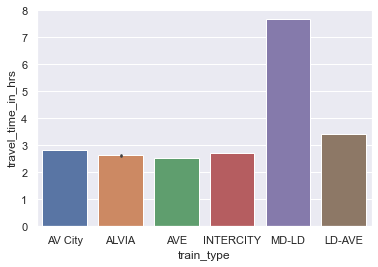

In [33]:
sns.barplot(x='train_type',y='travel_time_in_hrs',data =df1)

#### **Task 23: Show train_type vs price through boxplot**


<AxesSubplot:xlabel='train_type', ylabel='price'>

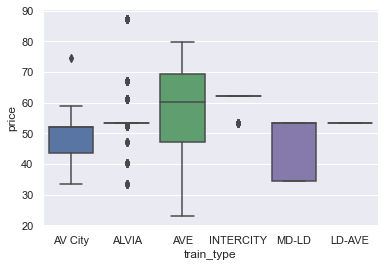

In [34]:
sns.boxplot(x='train_type',y='price',data=df1)

## **Travelling from MADRID to BARCELONA**


#### Task 24: Findout people travelling from MADRID to BARCELONA

In [35]:
df1 = df.loc[df['origin']=='MADRID']
df1 = df.loc[df['destination']=='BARCELONA']

#### Task 25: Make a plot for finding out travelling hours for each train type

<AxesSubplot:xlabel='train_type', ylabel='travel_time_in_hrs'>

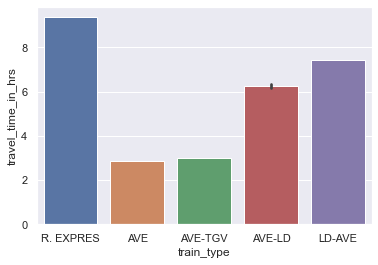

In [36]:
sns.barplot(x='train_type',y='travel_time_in_hrs',data =df1)

#### **Task 26: Show train_type vs price through boxplot**

<AxesSubplot:xlabel='train_type', ylabel='price'>

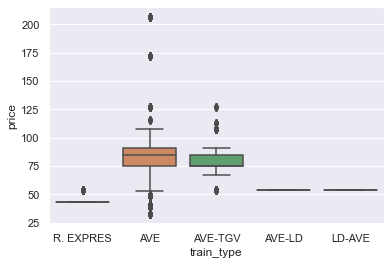

In [37]:
sns.boxplot(x='train_type',y='price',data=df1)

## **Travelling from MADRID to VALENCIA**

#### Task 27: Findout people travelling from MADRID to VALENCIA

In [38]:
df1 = df.loc[df['origin']=='MADRID']
df1 = df.loc[df['destination']=='VALENCIA']

#### Task 28: Make a plot for finding out travelling hours for each train type

<AxesSubplot:xlabel='train_type', ylabel='travel_time_in_hrs'>

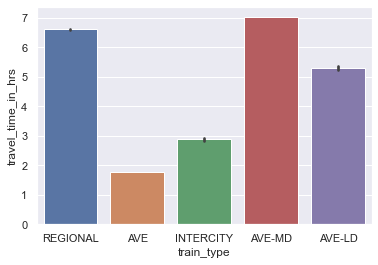

In [39]:
sns.barplot(x='train_type',y='travel_time_in_hrs',data =df1)

#### **Task 29: Show train_type vs price through boxplot**

<AxesSubplot:xlabel='train_type', ylabel='price'>

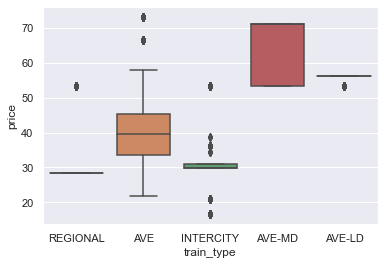

In [40]:
sns.boxplot(x='train_type',y='price',data=df1)

## **Travelling from MADRID to PONFERRADA**

#### Task 30: Findout people travelling from MADRID to PONFERRADA

In [41]:
df1 = df.loc[df['origin']=='MADRID']
df1 = df.loc[df['destination']=='PONFERRADA']

#### Task 31: Make a plot for finding out travelling hours for each train type

<AxesSubplot:xlabel='train_type', ylabel='travel_time_in_hrs'>

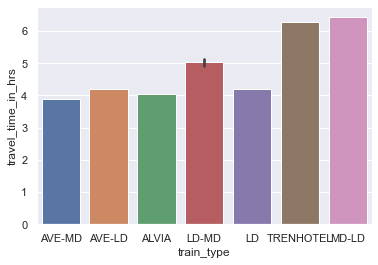

In [42]:
sns.barplot(x='train_type',y='travel_time_in_hrs',data =df1)

#### **Task 32: Show train_type vs price through boxplot**

<AxesSubplot:xlabel='train_type', ylabel='price'>

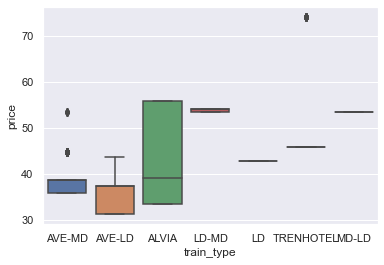

In [43]:
sns.boxplot(x='train_type',y='price',data=df1)

# Applying Linear  Regression

#### Task 33: Import LabelEncoder library from sklearn 

In [44]:
from sklearn import preprocessing

**Data Encoding**

In [45]:
lab_en = preprocessing.LabelEncoder()

In [46]:
df

,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.70
1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.80
2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,5.92
3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,4.98
4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,4.13
...,...,...,...,...,...,...,...
215261,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.63
215262,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.53
215263,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.63
215264,MADRID,SEVILLA,AVE,47.30,Turista,Promo,2.67


In [47]:
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])
df.iloc[:,6] = lab_en.fit_transform(df.iloc[:,6])

In [48]:
df.iloc[:,0] = lab_en.fit_transform(df.iloc[:,0])
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,4] = lab_en.fit_transform(df.iloc[:,4])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])

In [49]:
df.head()

,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,2,1,11,79,4,1,47
1,2,1,11,21,4,4,53
2,2,1,12,34,4,4,54
3,2,1,11,36,4,4,48
4,2,1,0,7,2,3,44


#### Task 34: Separate the dependant and independant variables

In [50]:
X = df.drop('price',axis = 1)
Y = df[['price']]

#### Task 35: Import test_train_split from sklearn

In [51]:
from sklearn.model_selection import train_test_split

#### Task 36:**Split the data into training and test set**

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

#### Task 37: Import LinearRegression library from sklearn

In [53]:
from sklearn.linear_model import LinearRegression

#### Task 38: Make an object of LinearRegression( ) and train it using the training data set

In [54]:
lr = LinearRegression()

In [55]:
trained_model = lr.fit(X_train,Y_train)

#### Task 39: Find out the predictions using test data set.

In [56]:
lr_predict = trained_model.predict(X_test)

#### Task 40: Find out the predictions using training data set.

In [57]:
lr_predict_train = trained_model.predict(X_train)

#### Task 41: Import r2_score library form sklearn

In [58]:
from sklearn.metrics import r2_score

#### Task 42: Find out the R2 Score for test data and print it.

In [59]:
lr_r2_test= r2_score(Y_test, lr_predict)
lr_r2_test

0.7680150962654372

#### Task 43: Find out the R2 Score for training data and print it.

In [60]:
lr_r2_train = r2_score(Y_train, lr_predict_train)
lr_r2_train

0.770987538187005

Comaparing training and testing R2 scores

In [72]:
print('R2 score for Linear Regression Training Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test)

R2 score for Linear Regression Training Data is:  0.770987538187005
R2 score for Linear Regression Testing Data is:  0.7680150962654372


# Applying Polynomial Regression

#### Task 44: Import PolynomialFeatures from sklearn

In [62]:
from sklearn.preprocessing import PolynomialFeatures

#### Task 45: Make and object of default Polynomial Features

In [63]:
poly_reg = PolynomialFeatures(degree=2)

#### Task 46: Transform the features to higher degree features.

In [64]:
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

In [65]:
X_train_poly

array([[1.000e+00, 4.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        5.329e+03],
       [1.000e+00, 4.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        5.929e+03],
       [1.000e+00, 4.000e+00, 1.000e+00, ..., 9.000e+00, 1.200e+01,
        1.600e+01],
       ...,
       [1.000e+00, 1.000e+00, 3.000e+00, ..., 9.000e+00, 4.200e+01,
        1.960e+02],
       [1.000e+00, 1.000e+00, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        4.225e+03],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 9.000e+00, 3.900e+01,
        1.690e+02]])

#### Task 47: Fit the transformed features to Linear Regression

In [66]:
poly_model_reg = LinearRegression()
poly_model_reg.fit(X_train_poly, Y_train)

LinearRegression()

#### Task 48: Find the predictions on the data set

In [67]:
y_train_predicted = poly_model_reg.predict(X_train_poly)
y_test_predicted = poly_model_reg.predict(X_test_poly)

#### Task 49: Evaluate R2 score for training data set

In [68]:
#evaluating the model on training dataset
r2_train = r2_score(Y_train, y_train_predicted)


#### Task 50: Evaluate R2 score for test data set

In [69]:
# evaluating the model on test dataset
r2_test = r2_score(Y_test, y_test_predicted)

Comaparing training and testing R2 scores

In [70]:
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

The r2 score for training set is:  0.8434084472550236
The r2 score for testing set is:  0.8403146130987839


#### Task 51: Select the best model

**Question: Which model gives the best result for price prediction? Find out the complexity using R2 score and give your answer.**<br>
*Hint: Use for loop for finding the best degree and model complexity for polynomial regression model*

In [97]:
r2_train=[]
r2_test=[]
for i in range(1,6):
    poly_reg = PolynomialFeatures(degree=i)
    X_tr_poly,X_tst_poly = poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)
    poly = LinearRegression()
    poly.fit(X_tr_poly, Y_train)
   
    y_tr_predicted,y_tst_predict = poly.predict(X_tr_poly),poly.predict(X_tst_poly)


    r2_train.append(r2_score(Y_train, y_tr_predicted))
    r2_test.append(r2_score(Y_test, y_tst_predict))
    
print ('R2 Train', r2_train,'\n\n')
print ('R2 Test', r2_test,'\n')

R2 Train [0.7709875381870049, 0.8434084472550236, 0.8719009509943987, 0.8841250535989069, 0.889487281149017] 


R2 Test [0.7680150962654371, 0.8403146130987839, 0.8681985674707207, 0.8729625068539402, -1084.343020888719] 



#### Plotting the model

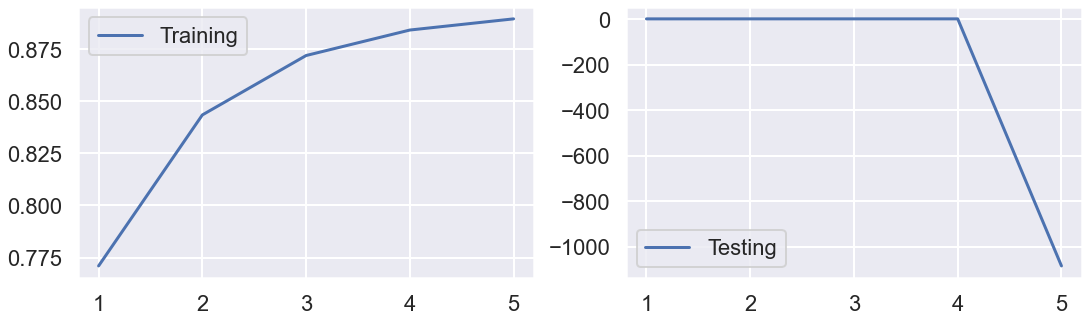

In [98]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=r2_train, label='Training');
plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=r2_test, label='Testing');

**Answer** When we increase polynomial degree more that 5, the model becomes overfit: it works well on training data but not works well on testing data. we can observe this behavior from the above graphs.